In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [ ]:
df=pd.read_csv(path + "/loan_data.csv" , encoding='ISO-8859-1')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


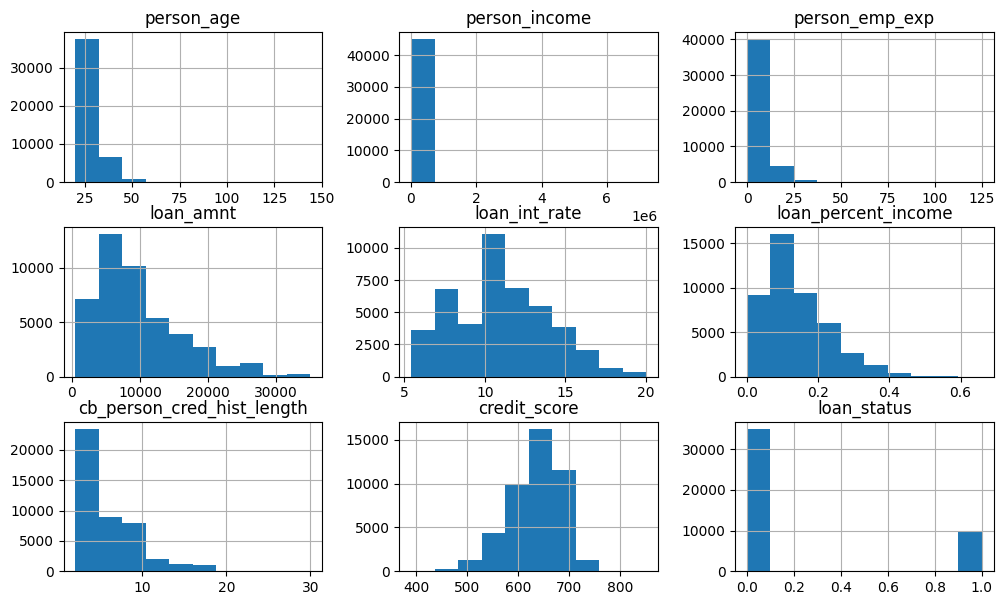

In [ ]:
df.hist(figsize=(12,7));

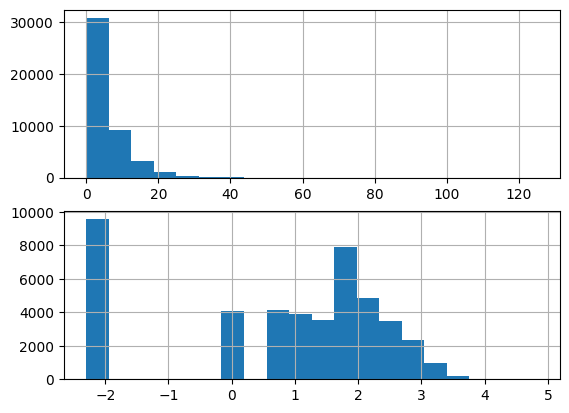

In [ ]:
plt.subplot(2,1,1)
df['person_emp_exp'].hist(bins=20)
plt.subplot(2,1,2)
np.log(df['person_emp_exp']+0.1).hist(bins=20);

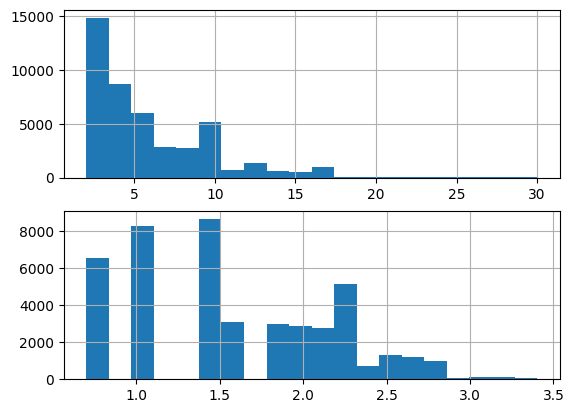

In [ ]:
plt.subplot(2,1,1)
df['cb_person_cred_hist_length'].hist(bins=20)
plt.subplot(2,1,2)
np.log(df['cb_person_cred_hist_length']+0.01).hist(bins=20);

<Figure size 1200x600 with 0 Axes>

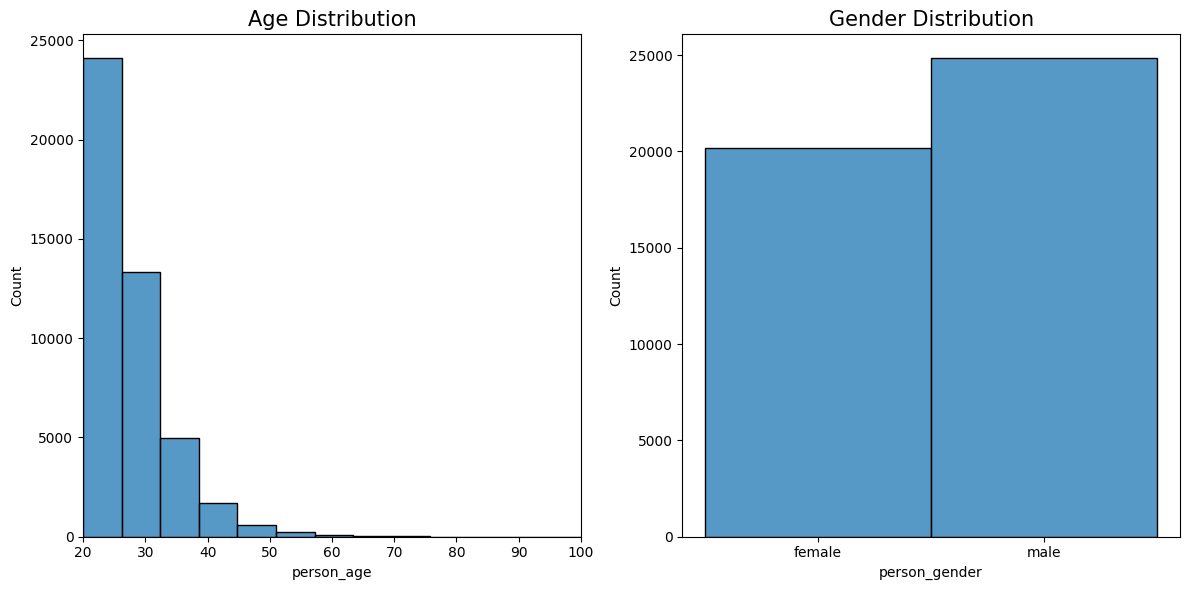

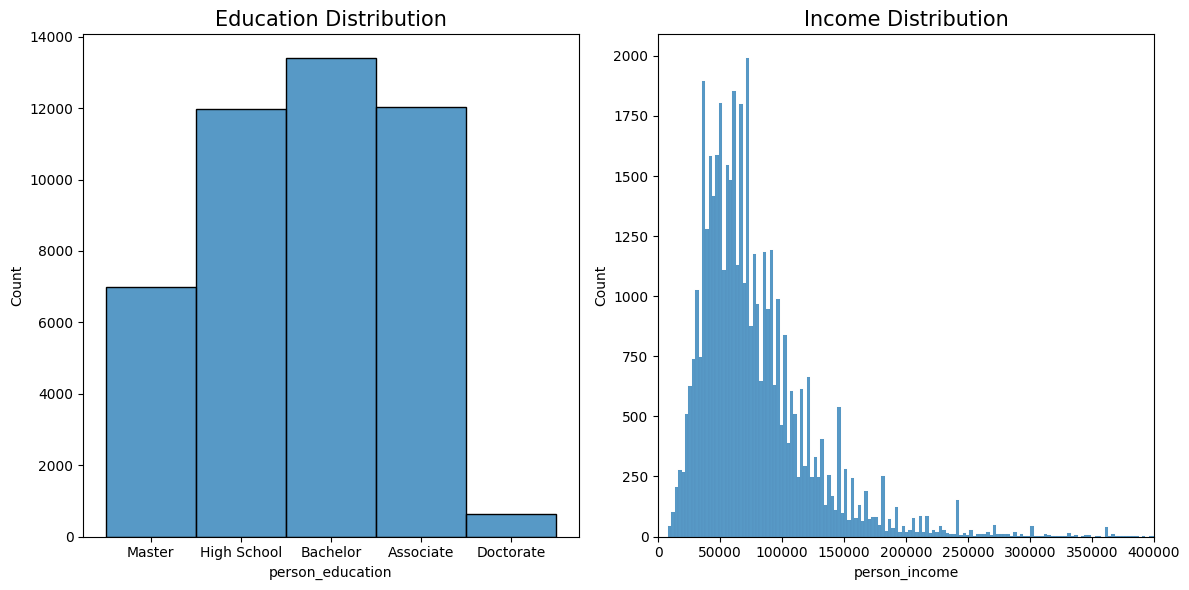

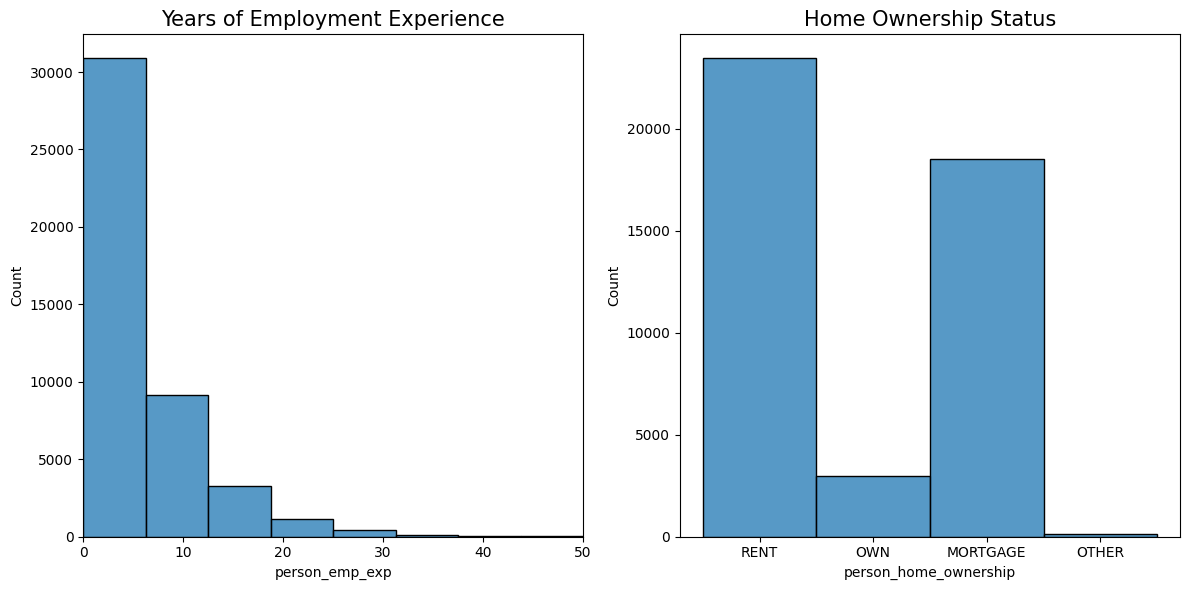

In [ ]:
bigfig = plt.figure(figsize=(12,6))

(top, middle, bottom) = bigfig.subfigures(3,1)
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=df, x='person_age', bins=20, ax=ax1)
ax1.set_xlim(20, 100)
ax1.set_title('Age Distribution', size=15)

ax2 = sns.histplot(data=df, x='person_gender', ax=ax2)
ax2.set_title('Gender Distribution', size=15)

plt.tight_layout()
middle.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=df, x='person_education', ax=ax1)
ax1.set_title('Education Distribution', size=15)

ax2 = sns.histplot(data=df, x='person_income', ax=ax2)
ax2.set_title('Income Distribution', size=15)
ax2.set_xlim(0, 400000)

plt.tight_layout()

bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=df, x='person_emp_exp', bins=20, ax=ax1)
ax1.set_title('Years of Employment Experience', size=15)
ax1.set_xlim(0, 50)

ax2 = sns.histplot(data=df, x='person_home_ownership', ax=ax2)
ax2.set_title('Home Ownership Status', size=15)

plt.tight_layout()

In [ ]:
X=df.drop('loan_status',axis=1)
y=df['loan_status'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_num = X_train.select_dtypes(include = np.number)
X_cat = X_train.select_dtypes(include = 'object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit_transform(X_cat).toarray()
X_cat=pd.DataFrame(encoder.fit_transform(X_cat).toarray(),columns=encoder.get_feature_names_out())

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
pd.DataFrame(scaler.fit_transform(X_num),columns=X_num.columns)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,1.039475,0.194225,0.931186,0.859025,0.577910,0.119054,0.816732,-0.032444
1,-0.456186,-0.089962,-0.395014,0.383393,0.286925,0.233921,-0.478914,0.524687
2,2.202767,2.828167,2.091610,2.285919,-0.211430,-0.799885,1.334990,1.002227
3,-0.123817,0.158772,-0.229239,0.002888,2.052907,-0.455283,0.298474,0.166531
4,-0.123817,0.049373,0.268086,-0.399971,0.658182,-0.685018,-0.738043,1.459871
...,...,...,...,...,...,...,...,...
35995,-0.290001,0.091197,0.102311,0.165396,-1.663014,-0.225548,-0.478914,-1.465066
35996,-0.456186,-0.536266,-0.395014,-0.587529,0.230066,0.348788,-0.478914,0.285916
35997,0.873291,-0.261045,0.599636,0.178396,-0.087677,0.463655,0.816732,0.385404
35998,-0.290001,1.144986,0.102311,1.651744,2.337203,-0.340416,-0.738043,-0.569677


In [ ]:
num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(include='object').columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X_num_pipeline=Pipeline([
   # ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

X_cat_pipeline=Pipeline([
    #('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

transformer = ColumnTransformer(
    [
        ('num', X_num_pipeline, num_cols),
        ('cat', X_cat_pipeline, cat_cols)
    ])

X_train_prepared=pd.DataFrame(transformer.fit_transform(X_train),columns = transformer.get_feature_names_out())
X_test_prepared=pd.DataFrame(transformer.transform(X_test),columns = transformer.get_feature_names_out())

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_prepared,y_train)
log_reg.score(X_test_prepared,y_test)

0.8945555555555555

In [ ]:
full_pipeline = Pipeline([('transformer', transformer), ('logreg', LogisticRegression())])
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object'))])),
                ('logreg', LogisticRegression())])

In [ ]:
full_pipeline.score(X_test,y_test)

0.8945555555555555

In [ ]:
full_pipeline.predict(X_test.iloc[:10])

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [ ]:
y_test.iloc[:10]

,loan_status
37979,0
9911,0
43386,1
13822,0
44810,1
18495,0
25555,0
13316,1
12929,1
28374,0


In [ ]:
from sklearn.metrics import mean_absolute_error

preds = full_pipeline.predict(X_test)
mean_absolute_error(y_test,preds)


0.10544444444444444

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(full_pipeline,X_train ,y_train,scoring="neg_mean_absolute_error",cv=5)

scores

array([-0.10805556, -0.09902778, -0.10444444, -0.10069444, -0.10388889])

In [ ]:
from sklearn.metrics import confusion_matrix
y_train_pred = full_pipeline.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[26317,  1693],
       [ 2002,  5988]])

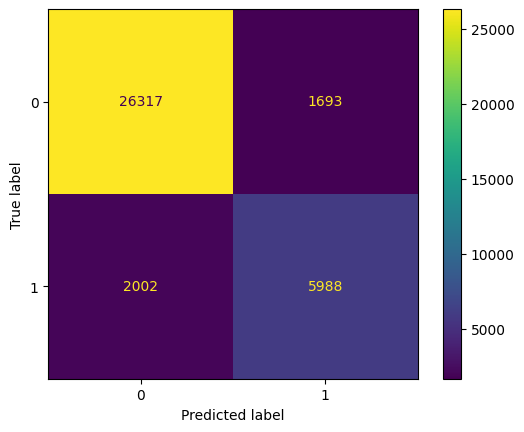

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(full_pipeline, X_train, y_train)
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_train, y_train_pred)

0.7795859914073688

In [ ]:
recall_score(y_train,y_train_pred)

0.7494367959949937

In [ ]:
f1_score(y_train,y_train_pred)

0.7642141535320018

In [ ]:
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[26317,  1693],
       [ 2002,  5988]])

In [ ]:
cm[1,1]/(cm[1,1]+cm[0,1])     #precision Tp/(Tp+Fp)

0.7795859914073688

In [ ]:
cm[1,1]/(cm[1,1]+cm[1,0])     #recall Tp/(Tp+Fn)

0.7494367959949937

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions,recalls, thresholds=precision_recall_curve(y_train,y_train_pred)

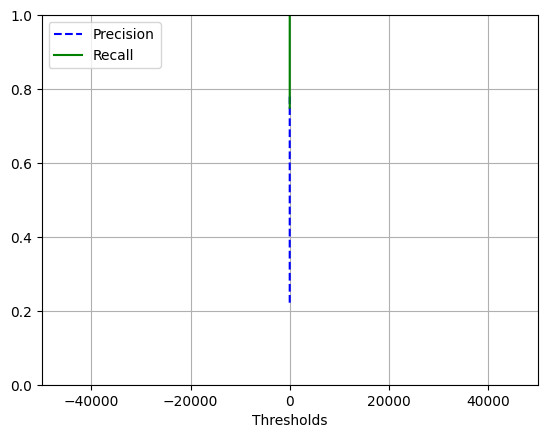

In [ ]:
plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.axis([-50000,50000,0,1])
plt.grid()
plt.show()